## A.C

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [2]:
data = pd.read_csv(r"E:\tmu . machine\EX\تمرین 2\cargo+2000+freight+tracking+and+tracing (1)\c2k_data_comma.csv")
data = data.replace('?', np.nan) 

In [3]:
data

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,...,o_dep_3_p,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0.0,5182.0,199.0,218.0,210.0,215.0,609.0,935.0,736.0,256.0,...,NaN,NaN,NaN,NaN,NaN,NaN,780.0,434.0,1.0,2.0
1,1.0,6523.0,844.0,584.0,90.0,297.0,700.0,1935.0,1415.0,431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3870.0,445.0,1.0,2.0
2,2.0,5878.0,4380.0,4119.0,90.0,280.0,456.0,905.0,547.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,550.0,1520.0,1.0,1.0
3,3.0,1275.0,759.0,169.0,240.0,777.0,173.0,340.0,577.0,349.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3780.0,159.0,1.0,1.0
4,4.0,8117.0,1597.0,1485.0,150.0,241.0,411.0,585.0,612.0,128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4140.0,4797.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,3939.0,4225.0,122.0,19.0,240.0,278.0,815.0,830.0,761.0,174.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1665.0,1300.0,2.0,3.0
3939,3940.0,14017.0,2028.0,413.0,270.0,1825.0,605.0,2610.0,2535.0,349.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3780.0,807.0,2.0,1.0
3940,3941.0,4660.0,1356.0,178.0,240.0,1359.0,815.0,760.0,716.0,609.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5100.0,4381.0,2.0,1.0
3941,3942.0,6472.0,2692.0,1856.0,90.0,867.0,700.0,1060.0,1049.0,113.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3780.0,945.0,2.0,2.0


In [4]:
data = data.drop(index=3942)

In [5]:
data = data.drop("nr", axis=1)

In [6]:
#data = data.drop("legs", axis=1)

In [7]:
data

,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,i1_dep_2_p,...,o_dep_3_p,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops,legs
0,5182.0,199.0,218.0,210.0,215.0,609.0,935.0,736.0,256.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,780.0,434.0,1.0,2.0
1,6523.0,844.0,584.0,90.0,297.0,700.0,1935.0,1415.0,431.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3870.0,445.0,1.0,2.0
2,5878.0,4380.0,4119.0,90.0,280.0,456.0,905.0,547.0,700.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,550.0,1520.0,1.0,1.0
3,1275.0,759.0,169.0,240.0,777.0,173.0,340.0,577.0,349.0,1340,...,NaN,NaN,NaN,NaN,NaN,NaN,3780.0,159.0,1.0,1.0
4,8117.0,1597.0,1485.0,150.0,241.0,411.0,585.0,612.0,128.0,340,...,NaN,NaN,NaN,NaN,NaN,NaN,4140.0,4797.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,4166.0,703.0,360.0,210.0,493.0,233.0,1000.0,908.0,815.0,605,...,NaN,NaN,NaN,NaN,NaN,NaN,300.0,2512.0,2.0,3.0
3938,4225.0,122.0,19.0,240.0,278.0,815.0,830.0,761.0,174.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1665.0,1300.0,2.0,3.0
3939,14017.0,2028.0,413.0,270.0,1825.0,605.0,2610.0,2535.0,349.0,2915,...,NaN,NaN,NaN,NaN,NaN,NaN,3780.0,807.0,2.0,1.0
3940,4660.0,1356.0,178.0,240.0,1359.0,815.0,760.0,716.0,609.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5100.0,4381.0,2.0,1.0


In [8]:
#we shoud fill NAN 
# we use mean for fill the nan value 
# Importing the class called SimpleImputer from impute model in sklearn
from sklearn.impute import SimpleImputer
# To replace the missing value we create below object of SimpleImputer class
imputa = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputa.fit(data)
new_data=imputa.transform(data)
#new_data=pd.DataFrame(new_data)
new_data

array([[5.1820e+03, 1.9900e+02, 2.1800e+02, ..., 4.3400e+02, 1.0000e+00,
        2.0000e+00],
       [6.5230e+03, 8.4400e+02, 5.8400e+02, ..., 4.4500e+02, 1.0000e+00,
        2.0000e+00],
       [5.8780e+03, 4.3800e+03, 4.1190e+03, ..., 1.5200e+03, 1.0000e+00,
        1.0000e+00],
       ...,
       [1.4017e+04, 2.0280e+03, 4.1300e+02, ..., 8.0700e+02, 2.0000e+00,
        1.0000e+00],
       [4.6600e+03, 1.3560e+03, 1.7800e+02, ..., 4.3810e+03, 2.0000e+00,
        1.0000e+00],
       [6.4720e+03, 2.6920e+03, 1.8560e+03, ..., 9.4500e+02, 2.0000e+00,
        2.0000e+00]])

In [9]:
new_data.shape

(3942, 97)

In [10]:
X = new_data[:,:96]

In [11]:
y =new_data[:,96]

In [12]:
 X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.30, random_state=1)

In [13]:
#fit gassianNB
model = GaussianNB()

In [14]:
#train 
model.fit(X_train,y_train)

GaussianNB()

In [15]:
y_pred=model.predict(X_test)

In [16]:
# #compute the confusion matrix.
from sklearn.metrics import confusion_matrix
actual = y_test
predicted = y_pred
confusion_matrix = confusion_matrix(actual,predicted)
confusion_matrix

array([[388,   0,   1],
       [  0, 368,   4],
       [  0,   0, 422]], dtype=int64)

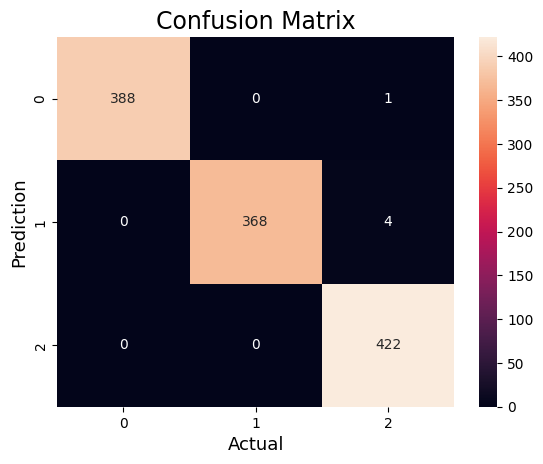

In [17]:
#plot the confusion matrix.
import matplotlib.pyplot as plt 
import seaborn as sns
#Plot the confusion matrix.
sns.heatmap(confusion_matrix, 
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
# Finding precision and recall and f1_score

precision = precision_score(y_test, y_pred,average='macro')
print("Precision :", precision)
recall = recall_score(y_test, y_pred,average='macro')
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred,average='macro')
print("F1-score  :", F1_score)


Precision : 0.9960967993754878
Recall    : 0.9955588725801845
F1-score  : 0.9958061039333125


In [20]:
#fp_rate & fN_rate
# we know False Positive Rate (FPR) = FP/ (FP+TN) False Negative Rate (FNR)= FN (FN+TP)
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

In [21]:
FPR = FP/(FP+TN)
print("FPR=",FPR)
FNR= FN/(FN+TP)
print("FNR=",FNR)

FPR= [0.        0.        0.0065703]
FNR= [0.00257069 0.01075269 0.        ]


## A.A

In [22]:
# calculate baysian probeblity : Likelihood، Posterior، Evidence، Prior
import numpy as np
from scipy.stats import norm

prior_mean = np.mean(new_data, axis=0)
prior_std = np.std(new_data, axis=0)

print("Prior Mean:", prior_mean)
print("Prior Standard Deviation:", prior_std)

# likelihood
likelihood_mean = np.mean(new_data)
likelihood_std = np.std(new_data)

# calculate prior
prior = norm.pdf(new_data, loc=prior_mean, scale=prior_std)

# calculate likelihood
likelihood = norm.pdf(new_data, loc=likelihood_mean, scale=likelihood_std)

# calculate evidence
evidence = np.trapz(likelihood * prior, new_data, axis=0)

# calculate posterior
posterior = (likelihood * prior) / evidence

# چاپ نتایج
print("Prior:", prior)
print("Likelihood:", likelihood)
print("Evidence:", evidence)
print("Posterior:", posterior)


Prior Mean: [7.30449214e+03 2.20353349e+03 1.65332344e+03 2.05891933e+02
 7.11408929e+02 5.03703957e+02 7.96002790e+02 6.66358447e+02
 4.66677829e+02 8.90598326e+02 1.01890377e+03 4.19661925e+02
 8.78426778e+02 6.88034310e+02 4.63412552e+02 9.78000000e+02
 9.68347826e+02 5.27478261e+02 8.72869565e+02 7.96304348e+02
 4.93347826e+02 3.69426002e+03 2.25103551e+03 1.30898021e+00
 7.41244970e+03 2.32063758e+03 1.76789825e+03 2.08467226e+02
 7.31800305e+02 5.05145579e+02 8.10609375e+02 6.65747713e+02
 4.71871189e+02 8.96533502e+02 1.01281669e+03 4.38906448e+02
 8.63355247e+02 6.96930468e+02 4.58790139e+02 8.43142857e+02
 1.03000000e+03 6.06642857e+02 1.29550000e+03 1.08442857e+03
 6.03142857e+02 3.63896113e+03 2.39920008e+03 1.30678354e+00
 7.13016691e+03 2.46353148e+03 1.90606955e+03 2.08279649e+02
 7.29702050e+02 5.05969985e+02 8.05845534e+02 6.53551977e+02
 4.70399707e+02 8.67350384e+02 9.97283887e+02 4.22058824e+02
 8.63813299e+02 6.84670077e+02 4.53046036e+02 1.15937500e+03
 1.00700000e

C:\Users\USER\anaconda3\envs\mj\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\USER\anaconda3\envs\mj\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


## A.B

In [23]:
# Calculate the number of parameters for four different cases
num_classes = 97
num_features = 3942

# Calculate the number of parameters for each separate class
params_case1 = num_classes * (num_features ** 2 + num_features)
print('Number of parameters in each separate class:', params_case1)

# Calculate the number of parameters for a shared class
params_case2 = num_features ** 2 + num_features
print('Number of parameters in a shared class:', params_case2)

# Calculate the number of parameters for each class with separate parameters on the diagonal
params_case3 = num_classes * (num_features + num_features)
print('Number of parameters in each class with separate parameters on the diagonal:', params_case3)

# Calculate the number of parameters for a class with shared parameters on the diagonal
params_case4 = num_features
print('Number of parameters in a class with shared parameters on the diagonal:', params_case4)


Number of parameters in each separate class: 1507700682
Number of parameters in a shared class: 15543306
Number of parameters in each class with separate parameters on the diagonal: 764748
Number of parameters in a class with shared parameters on the diagonal: 3942


## 2

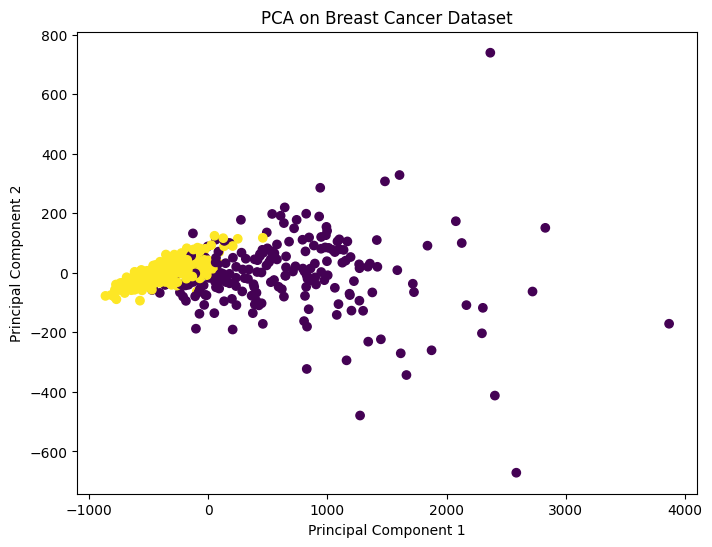

In [24]:
# Breast Cancer Dataset with Positive PCA Impact:
#This dataset encompasses characteristics related to breast cancer in women.
#It proves highly beneficial for disease diagnosis. By applying PCA, significant differences in characteristic features can be highlighted, enhancing the dimensionality representation of the data.

from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# load dataset
cancer = load_breast_cancer()
data = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
target = pd.Series(cancer.target, name='target')

# apply PCA
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)

# show result 
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=target, cmap='viridis')
plt.title('PCA on Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

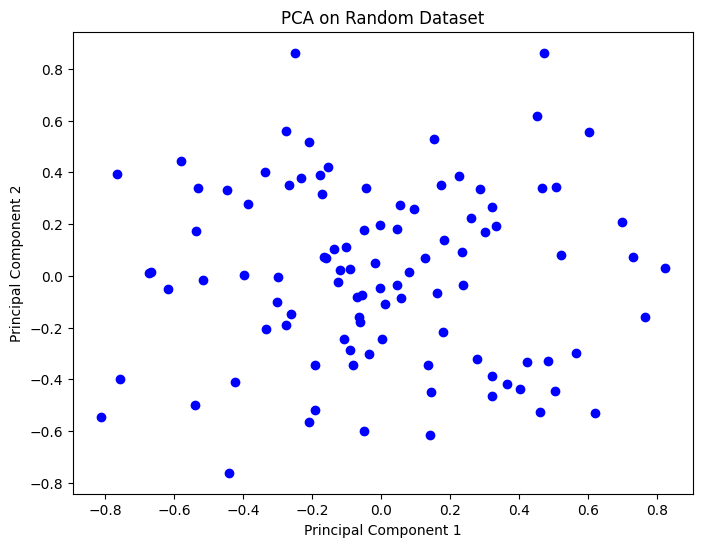

In [25]:
#This dataset consists of random data without any discernible pattern or meaningful correlation.
#Applying PCA to these data is expected to yield no significant impact on the dimensions of the data.

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create a random dataset without a pattern
np.random.seed(42)
random_data = np.random.rand(100, 10)
data = pd.DataFrame(data=random_data, columns=[f'Feature_{i+1}' for i in range(10)])

# Apply PCA
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)

# Display the reduced data in two dimensions
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color='blue')
plt.title('PCA on Random Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


POV=0.5: 1 dimensions
POV=0.7: 1 dimensions
POV=0.9: 1 dimensions
POV=0.93: 1 dimensions
POV=0.95: 1 dimensions
POV=0.97: 1 dimensions
POV=0.99: 2 dimensions


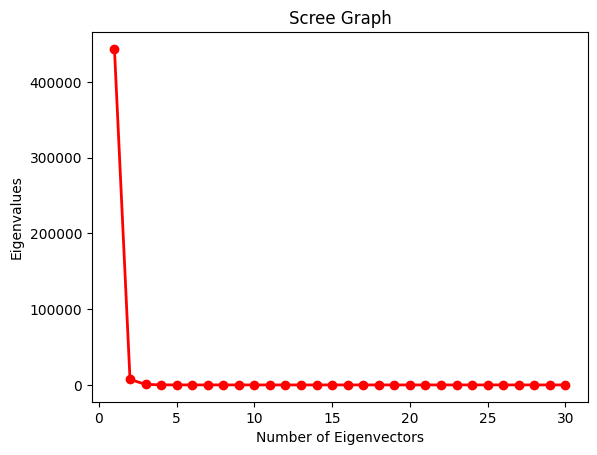

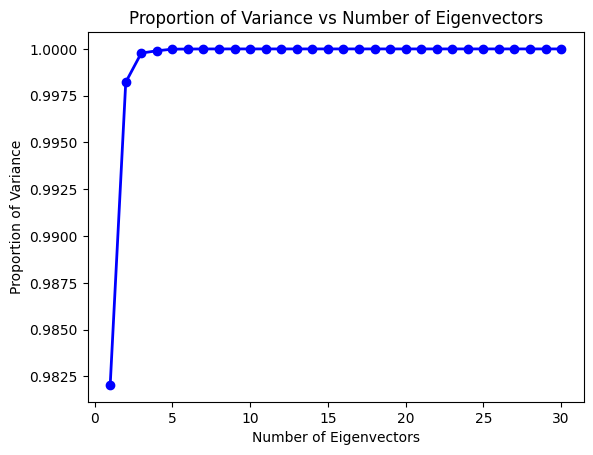

In [26]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Different values for POV
povs = [0.5, 0.7, 0.9, 0.93, 0.95, 0.97, 0.99]

# Save the number of dimensions for each POV
n_dims = []

# For each POV
for pov in povs:
    # Apply PCA
    pca = PCA(pov)
    pca.fit(X)
    n_dims.append(pca.n_components_)

# Display the number of dimensions obtained for each POV
for i, pov in enumerate(povs):
    print(f"POV={pov}: {n_dims[i]} dimensions")

# Scree graph & Proportion of variance explained
pca = PCA()
X_pca = pca.fit_transform(X)
n_eigenvectors = range(1, len(pca.explained_variance_ratio_) + 1)

# Display the Scree Graph
plt.figure()
plt.plot(n_eigenvectors, pca.explained_variance_, 'ro-', linewidth=2)
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Eigenvalues')
plt.title('Scree Graph')
plt.show()

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Display the Proportion of Variance vs Number of Eigenvectors Graph
plt.figure()
plt.plot(n_eigenvectors, cumulative_variance_ratio, 'bo-', linewidth=2)
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Proportion of Variance')
plt.title('Proportion of Variance vs Number of Eigenvectors')
plt.show()


POV = 0.5: Number of Dimensions = 4
POV = 0.7: Number of Dimensions = 6
POV = 0.9: Number of Dimensions = 9
POV = 0.93: Number of Dimensions = 9
POV = 0.95: Number of Dimensions = 10
POV = 0.97: Number of Dimensions = 10
POV = 0.99: Number of Dimensions = 10


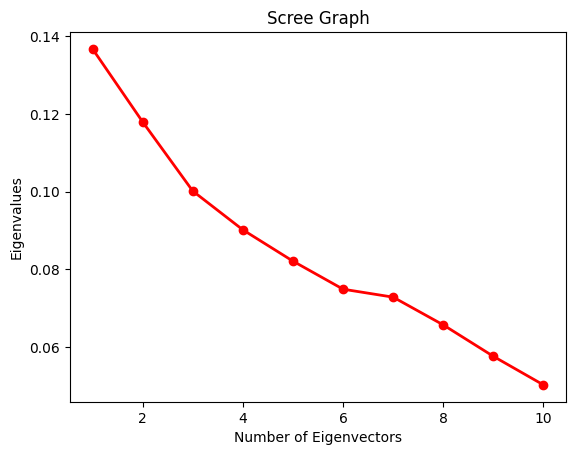

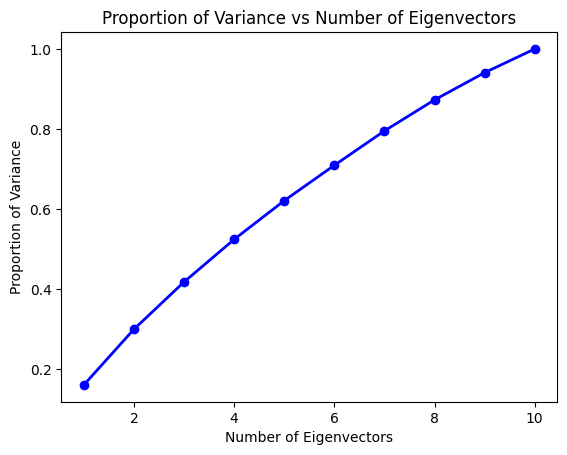

In [27]:
# Set seed for random number generation
np.random.seed(42)

# Generate a random dataset
random_data = np.random.rand(100, 10)
data = pd.DataFrame(data=random_data, columns=[f'Feature_{i+1}' for i in range(10)])

# Define POV values
pov_values = [0.5, 0.7, 0.9, 0.93, 0.95, 0.97, 0.99]

# Save the number of dimensions for each POV
dimensions_list = []

# For each POV
for pov in pov_values:
    # Apply PCA
    pca = PCA(pov)
    pca.fit(data)
    dimensions_list.append(pca.n_components_)

# Report POV and the number of dimensions
for i, pov in enumerate(pov_values):
    print(f'POV = {pov}: Number of Dimensions = {dimensions_list[i]}')

# Scree graph & Proportion of variance explained
pca = PCA()
X_pca = pca.fit_transform(data)
n_eigenvectors = range(1, len(pca.explained_variance_ratio_) + 1)

# Plot Scree Graph
plt.figure()
plt.plot(n_eigenvectors, pca.explained_variance_, 'ro-', linewidth=2)
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Eigenvalues')
plt.title('Scree Graph')
plt.show()

# Calculate cumulative variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot Proportion of Variance vs Number of Eigenvectors
plt.figure()
plt.plot(n_eigenvectors, cumulative_variance_ratio, 'bo-', linewidth=2)
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Proportion of Variance')
plt.title('Proportion of Variance vs Number of Eigenvectors')
plt.show()


## 2.B

In [30]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define POV values
pov_values = [0.5, 0.7, 0.9, 0.93, 0.95, 0.97, 0.99]

# For each POV
for pov in pov_values:
    # Apply PCA
    pca = PCA(pov)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Train a Gaussian Naive Bayes classifier without PCA
    model_no_pca = GaussianNB()
    model_no_pca.fit(X_train, y_train)
    y_pred_no_pca = model_no_pca.predict(X_test)
    accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
    
    # Train a Gaussian Naive Bayes classifier with PCA
    model_with_pca = GaussianNB()
    model_with_pca.fit(X_train_pca, y_train)
    y_pred_with_pca = model_with_pca.predict(X_test_pca)
    accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)
    
    # Report results
    print(f'POV = {pov}: Accuracy without PCA = {accuracy_no_pca:.4f}, Accuracy with PCA = {accuracy_with_pca:.4f}')


POV = 0.5: Accuracy without PCA = 0.9737, Accuracy with PCA = 0.9474
POV = 0.7: Accuracy without PCA = 0.9737, Accuracy with PCA = 0.9474
POV = 0.9: Accuracy without PCA = 0.9737, Accuracy with PCA = 0.9474
POV = 0.93: Accuracy without PCA = 0.9737, Accuracy with PCA = 0.9474
POV = 0.95: Accuracy without PCA = 0.9737, Accuracy with PCA = 0.9474
POV = 0.97: Accuracy without PCA = 0.9737, Accuracy with PCA = 0.9474
POV = 0.99: Accuracy without PCA = 0.9737, Accuracy with PCA = 0.9386


In [29]:
# Generate a random dataset
np.random.seed(42)
random_data = np.random.rand(100, 10)
data = pd.DataFrame(data=random_data, columns=[f'Feature_{i+1}' for i in range(10)])

# Define input and output variables
X, y = data.values, np.random.randint(2, size=100)  # Labels are randomly chosen

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define POV values
pov_values = [0.5, 0.7, 0.9, 0.93, 0.95, 0.97, 0.99]

# For each POV
for pov in pov_values:
    # Apply PCA
    pca = PCA(pov)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Train Gaussian Naive Bayes model without applying PCA
    model_no_pca = GaussianNB()
    model_no_pca.fit(X_train, y_train)
    y_pred_no_pca = model_no_pca.predict(X_test)
    accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
    
    # Train Gaussian Naive Bayes model with applying PCA
    model_with_pca = GaussianNB()
    model_with_pca.fit(X_train_pca, y_train)
    y_pred_with_pca = model_with_pca.predict(X_test_pca)
    accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)
    
    # Report the results
    print(f'POV = {pov}: Accuracy without PCA = {accuracy_no_pca:.4f}, Accuracy with PCA = {accuracy_with_pca:.4f}')


POV = 0.5: Accuracy without PCA = 0.4500, Accuracy with PCA = 0.5000
POV = 0.7: Accuracy without PCA = 0.4500, Accuracy with PCA = 0.6000
POV = 0.9: Accuracy without PCA = 0.4500, Accuracy with PCA = 0.6000
POV = 0.93: Accuracy without PCA = 0.4500, Accuracy with PCA = 0.6000
POV = 0.95: Accuracy without PCA = 0.4500, Accuracy with PCA = 0.5500
POV = 0.97: Accuracy without PCA = 0.4500, Accuracy with PCA = 0.5500
POV = 0.99: Accuracy without PCA = 0.4500, Accuracy with PCA = 0.5500


## END HOME WORK 